# Data

In [54]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
np.random.seed(100)

In [55]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'

In [56]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)['EUR=']
raw.head()

Date
2010-01-01    1.4323
2010-01-04    1.4411
2010-01-05    1.4368
2010-01-06    1.4412
2010-01-07    1.4318
Name: EUR=, dtype: float64

<Axes: title={'center': 'EUR/USD monthlyl'}, xlabel='Date'>

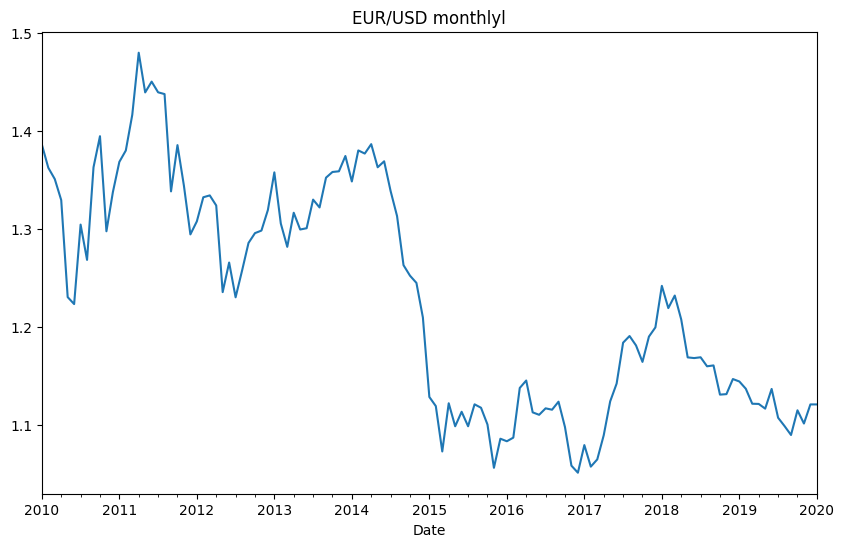

In [57]:
# resample the data to montly time intervals
l = raw.resample('1M').last()
l.plot(figsize=(10, 6), title='EUR/USD monthlyl')

In [58]:
# transforms the labels data to an `ndarray` object
l = l.values

In [59]:
# subtracts the mean value from the data element-wise
l -= l.mean()

In [60]:
# creates a synthetic feature as an `ndarray` object
f = np.linspace(-2, 2, len(l))

Text(0, 0.5, 'labels')

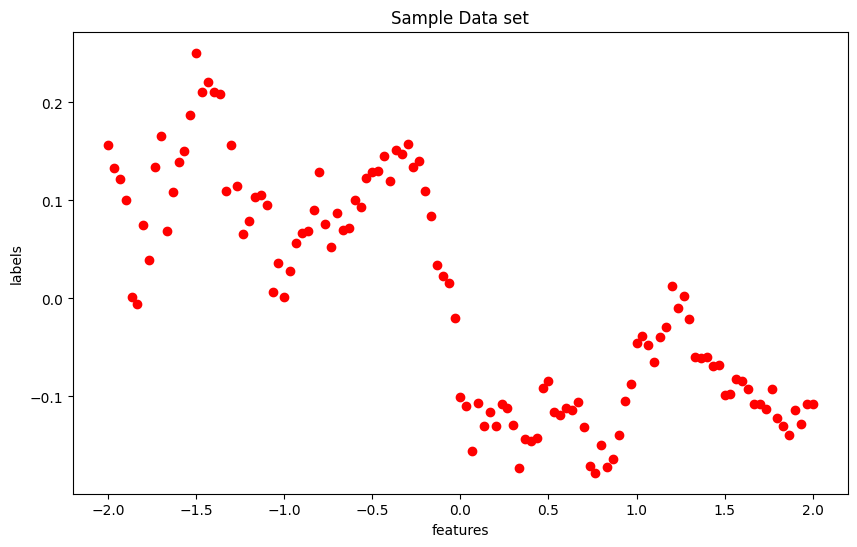

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro')
plt.title('Sample Data set')
plt.xlabel('features')
plt.ylabel('labels')

# Success

In [62]:
# the function MSE calculates the mean-sqaured error
def MSE(l, p):
    return np.mean((l - p) ** 2)

In [63]:
# the fitting of the OLS regression model up to and including fifth-order monomials.
reg = np.polyfit(f, l, deg=5)
reg

array([-0.01910626, -0.0147182 ,  0.10990388,  0.06007211, -0.20833598,
       -0.03275423])

In [64]:
# the prediction by the OLS regression model given the optimal parameters
p = np.polyval(reg, f)

In [65]:
# the MSE value given the prediction values
MSE(l, p)

0.0034166422957371025

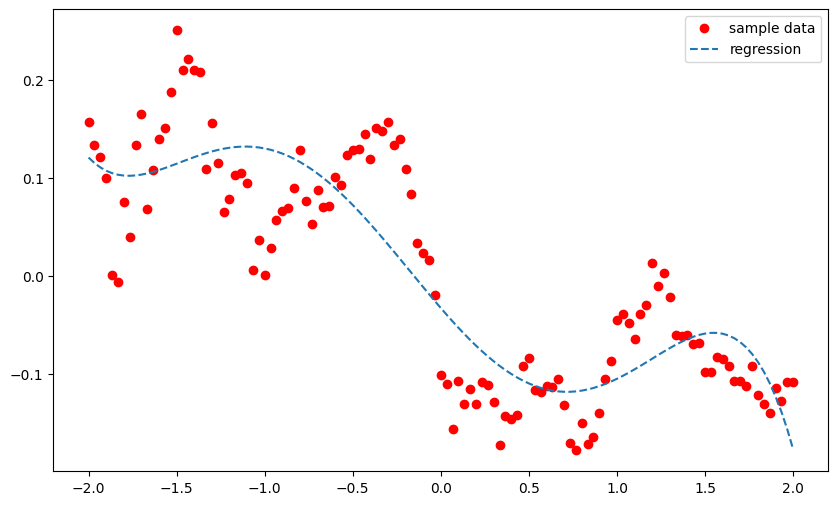

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample data')
plt.plot(f, p, '--', label='regression')
plt.legend()

The following Python code implements OLS regression and prediction, starting with a few samples only and gradually increasing the number to finally reach the complete length of the data set.

In [67]:
for i in range(10, len(f) + 1, 20):
    # regression step based on data sub-set
    reg = np.polyfit(f[:i], l[:i], deg=3)
    # prediction step based on the complete data set
    p = np.polyval(reg, f)
    mse = MSE(l, p)
    print(f'{i:3d} | MSE={mse}')

 10 | MSE=248628.10681642307
 30 | MSE=731.9382249304656
 50 | MSE=12.236088505004469
 70 | MSE=0.7410590619743299
 90 | MSE=0.005743061730409331
110 | MSE=0.006492800939555579


Second is the neural network.

In [68]:
import logging
import tensorflow as tf
tf.random.set_seed(100)

tf.get_logger().setLevel(logging.ERROR)

In [69]:
from keras.layers import Dense
from keras.models import Sequential

In [70]:
model = Sequential()
# the nuerl network is shallow network with a single hidden layer
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               512       
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 769 (3.00 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
# the fitting step with a relatively high number of epochs
%time h = model.fit(f, l, epochs=1500, verbose=False)

CPU times: user 13.8 s, sys: 642 ms, total: 14.4 s
Wall time: 21 s


In [73]:
# the prediction step that also flattens the `ndarray object`
p = model.predict(f).flatten()

4/4 [==============================] - 0s 3ms/step


In [74]:
MSE(l, p)

0.002093199842177862

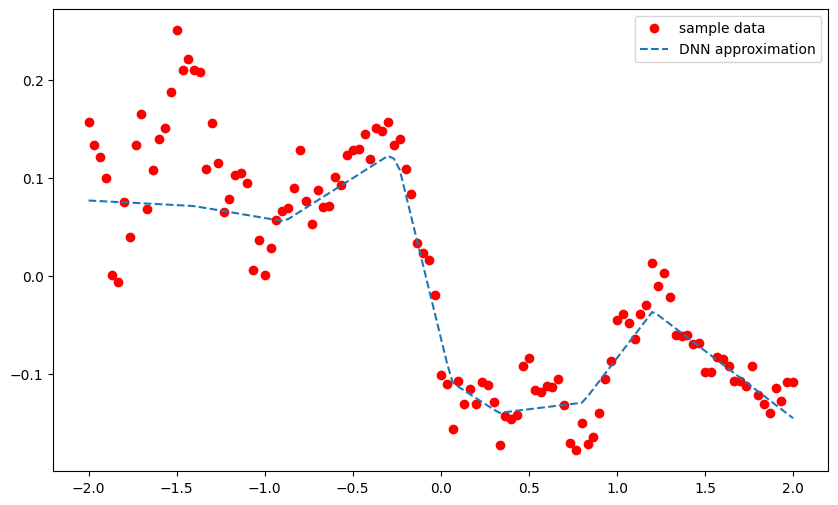

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample data')
plt.plot(f, p, '--', label='DNN approximation')
plt.legend()

With the `Keras` package, the MSE are stored after every learning step.

In [76]:
import pandas as pd
res = pd.DataFrame(h.history)

In [77]:
res.tail()

,loss
1495,0.001711
1496,0.001841
1497,0.001830
1498,0.001839
1499,0.002154


Text(0.5, 0, 'epochs')

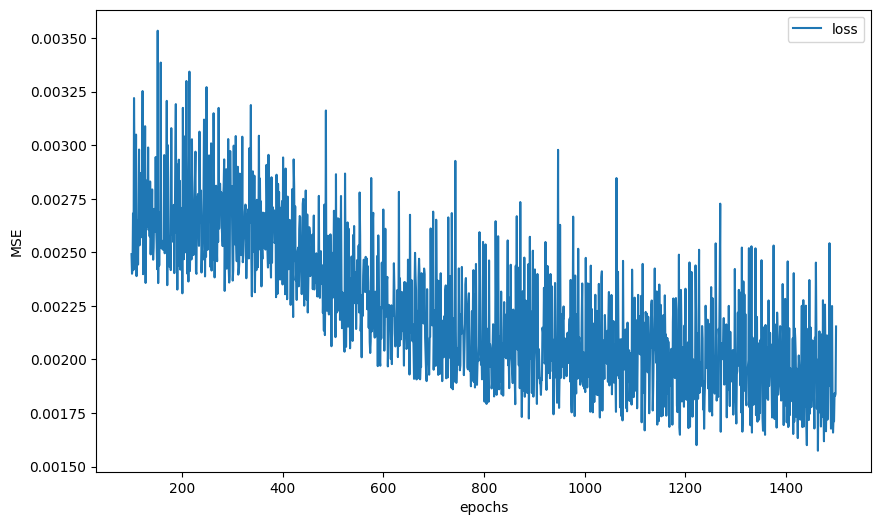

In [78]:
res.iloc[100:].plot(figsize=(10, 6))
plt.ylabel('MSE')
plt.xlabel('epochs')

# Capacity

The capacity of a model or algorithm defines what types of functional or relationships the model or algorithm can basically learn.

In [79]:
# regression step for different values for `deg`
reg = {}
for d in range(1, 12, 2):
    reg[d] = np.polyfit(f, l, deg=d)
    p = np.polyval(reg[d], f)
    mse = MSE(l, p)
    print(f'{d:2d} | MSE={mse}')

 1 | MSE=0.005322474034260403
 3 | MSE=0.004353110724143182
 5 | MSE=0.0034166422957371025
 7 | MSE=0.0027389501772354004
 9 | MSE=0.0014119616263308448
11 | MSE=0.00126512378687523


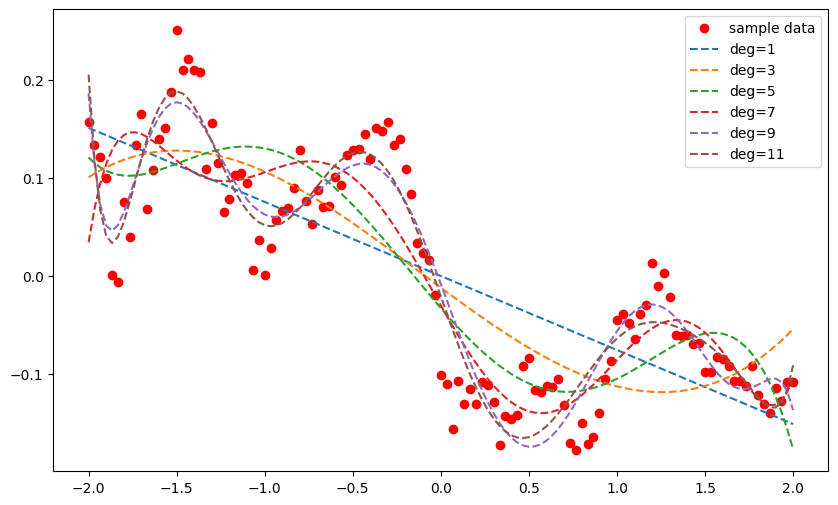

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample data')
for d in reg:
    p = np.polyval(reg[d], f)
    plt.plot(f, p, '--', label=f'deg={d}')
    plt.legend()

In [81]:
def create_dnn_model(hl=1, hu=256):
    ''' Function to create Keras DNN model
    Parameters
    ==========
    hl : int
      number of hidden layers
    hu : int
      number of hidden units (per layer)
    '''
    model = Sequential()
    for _ in range(hl):
        model.add(Dense(hu, activation='relu', input_dim=1))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='rmsprop')
    return model

In [82]:
model = create_dnn_model(3)

In [83]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               512       
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 132353 (517.00 KB)
Trainable params: 132353 (517.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
%time model.fit(f, l, epochs=2500, verbose=False)

CPU times: user 56.5 s, sys: 2.85 s, total: 59.3 s
Wall time: 46.2 s


In [85]:
p = model.predict(f).flatten()

4/4 [==============================] - 0s 4ms/step


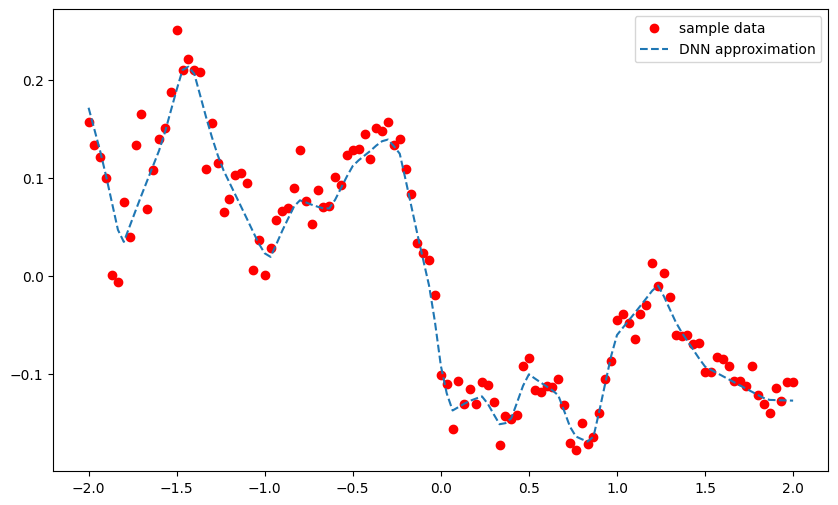

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample data')
plt.plot(f, p, '--', label='DNN approximation')
plt.legend()

# Evaluation

A real prediction probably entails prediction something not known up front and never seen before.

- <b>Training data set</b> : the sub-set used for the training of the alrogithm
- <b>Validation data set</b> : the sub-set used for validating the performance of the algorithm during training
- <b>Test data set</b> : the sub-set on which the trained algorithm is only tested after the training is finished

In [107]:
# number of test data set samples
te = np.int(0.25 * len(f))
# number of validation data set samples
va = np.int(0.25 * len(f))

<ipython-input-107-96427cdd1d0b>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  te = np.int(0.25 * len(f))
<ipython-input-107-96427cdd1d0b>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more de

In [101]:
np.random.seed(100)
# randomized index for complete data set
ind = np.arange(len(f))
np.random.shuffle(ind)

In [110]:
# resulting sorted indexes for the data subsets
ind_te = np.sort(ind[:te])
ind_va = np.sort(ind[te:te+va])
ind_tr = np.sort(ind[te+va:])

In [111]:
ind_te, ind_va, ind_tr

(array([ 11,  21,  25,  26,  28,  29,  32,  33,  35,  36,  37,  43,  45,
         46,  54,  62,  69,  70,  77,  82,  91,  92,  96,  99, 102, 104,
        107, 108, 111, 115]),
 array([  0,   3,   5,   6,  12,  17,  20,  22,  23,  40,  41,  42,  50,
         51,  57,  68,  73,  75,  76,  78,  80,  81,  84,  85,  88,  90,
        101, 116, 117, 120]),
 array([  1,   2,   4,   7,   8,   9,  10,  13,  14,  15,  16,  18,  19,
         24,  27,  30,  31,  34,  38,  39,  44,  47,  48,  49,  52,  53,
         55,  56,  58,  59,  60,  61,  63,  64,  65,  66,  67,  71,  72,
         74,  79,  83,  86,  87,  89,  93,  94,  95,  97,  98, 100, 103,
        105, 106, 109, 110, 112, 113, 114, 118, 119]))

In [112]:
# resulting features data sub-set
f_te = f[ind_te]
f_va = f[ind_va]
f_tr = f[ind_tr]

In [113]:
l_te = l[ind_te]
l_va = l[ind_va]
l_tr = l[ind_tr]

In [114]:
reg = {}
mse = {}
for d in range(1, 22, 4):
    reg[d] = np.polyfit(f_tr, l_tr, deg=d)
    p = np.polyval(reg[d], f_tr)
    # MSE value for the training data set
    mse_tr = MSE(l_tr, p)
    # MSE value for the validation data set
    p = np.polyval(reg[d], f_va)
    mse_va = MSE(l_va, p)
    mse[d] = (mse_tr, mse_va)
    print(f'{d:2d} | MSE_tr={mse_tr:7.5f} | MSE_va={mse_va:7.5f}')

 1 | MSE_tr=0.00574 | MSE_va=0.00492
 5 | MSE_tr=0.00375 | MSE_va=0.00273
 9 | MSE_tr=0.00132 | MSE_va=0.00243
13 | MSE_tr=0.00094 | MSE_va=0.00183
17 | MSE_tr=0.00060 | MSE_va=0.00153
21 | MSE_tr=0.00046 | MSE_va=0.00837


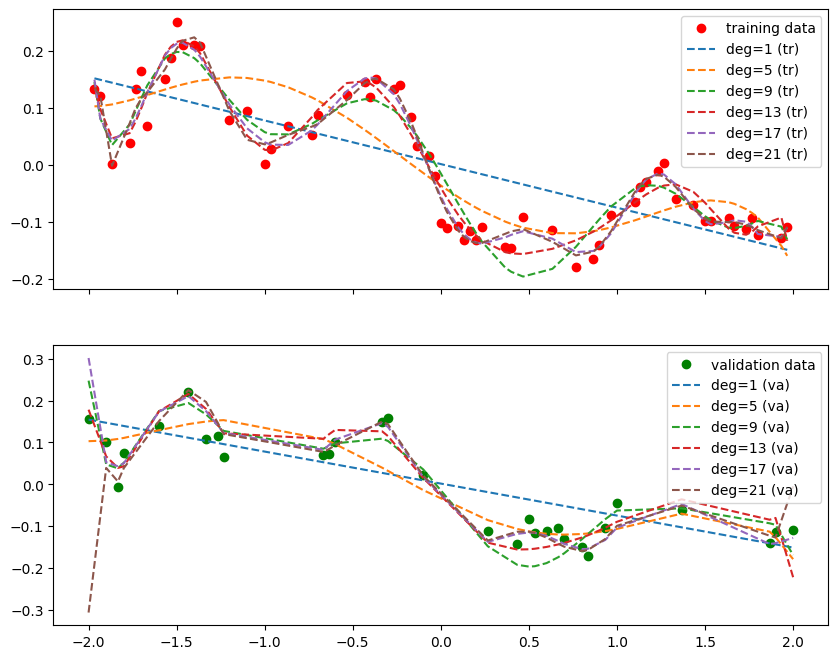

In [116]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
ax[0].plot(f_tr, l_tr, 'ro', label='training data')
ax[1].plot(f_va, l_va, 'go', label='validation data')

for d in reg:
    p = np.polyval(reg[d], f_tr)
    ax[0].plot(f_tr, p, '--', label=f'deg={d} (tr)')
    p = np.polyval(reg[d], f_va)
    plt.plot(f_va, p, '--', label=f'deg={d} (va)')
    ax[0].legend()
    ax[1].legend()

In [117]:
# Keras and the neural network model

from keras.callbacks import EarlyStopping

In [118]:
model = create_dnn_model(2, 256)

In [119]:
callbacks = [EarlyStopping(monitor='loss',  # learning is stopped based on training data MSE value
                           patience=100,    # only stopeed after a cetain number of epochs that do not show an improvement
                           restore_best_weights=True  # the best weights are restored when the learning is stopped
                           )]

In [121]:
%%time
h = model.fit(f_tr, l_tr, epochs=3000, verbose=False,
              validation_data=(f_va, l_va),   # the validation data sub-sets are specified
              callbacks=callbacks)            # the callback function is passed to the fit() method

CPU times: user 41.8 s, sys: 1.52 s, total: 43.3 s
Wall time: 41.2 s


1/1 [==============================] - 0s 28ms/step


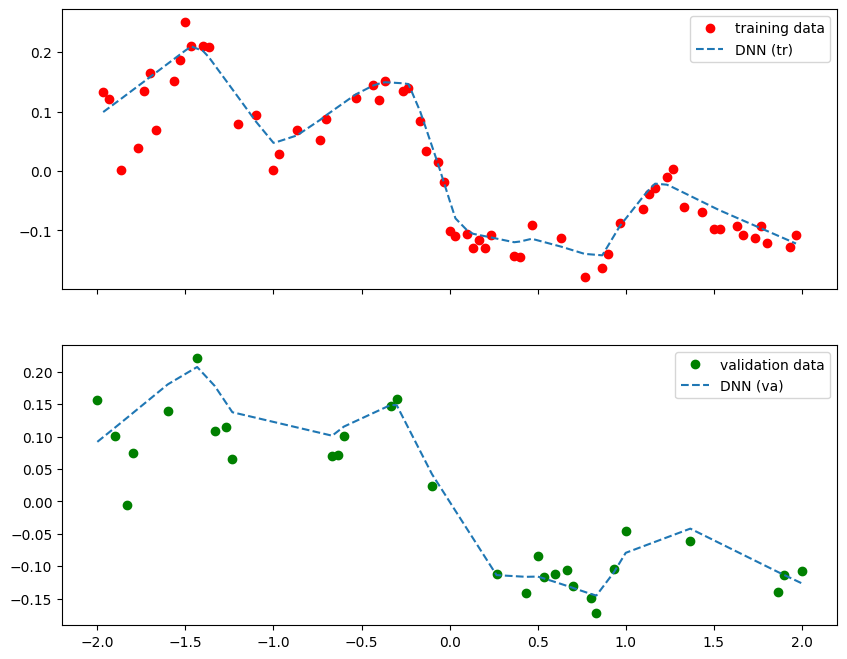

In [122]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
ax[0].plot(f_tr, l_tr, 'ro', label='training data')
p = model.predict(f_tr)
ax[0].plot(f_tr, p, '--', label=f'DNN (tr)')
ax[0].legend()
ax[1].plot(f_va, l_va, 'go', label='validation data')
p = model.predict(f_va)
ax[1].plot(f_va, p, '--', label=f'DNN (va)')
ax[1].legend()

In [123]:
res = pd.DataFrame(h.history)
res.tail()

,loss,val_loss
1134,0.000889,0.001497
1135,0.000991,0.001337
1136,0.000864,0.001389
1137,0.000871,0.001444
1138,0.000849,0.001507


In [125]:
res.iloc[35::25]

,loss,val_loss
35,0.003559,0.001939
60,0.004429,0.004200
85,0.004590,0.009001
110,0.003044,0.003434
135,0.002594,0.003969
160,0.002431,0.002955
185,0.002441,0.002415
210,0.002371,0.002075
235,0.003073,0.001657
260,0.002481,0.002633


Text(0.5, 0, 'epochs')

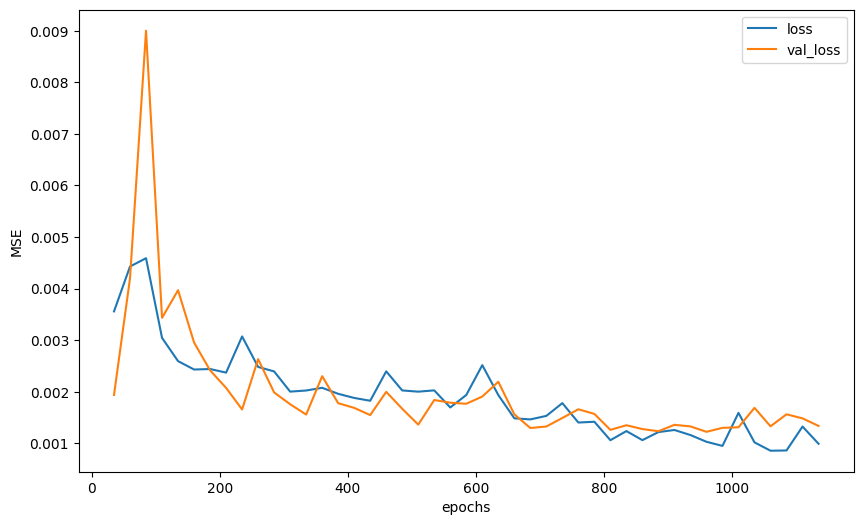

In [126]:
res.iloc[35::25].plot(figsize=(10, 6))  #iloc[star::interval]
plt.ylabel('MSE')
plt.xlabel('epochs')

Compare the prediction of both models : OLS as `deg=5` and DNN

In [127]:
p_ols = np.polyval(reg[5], f_te)
p_dnn = model.predict(f_te).flatten()

1/1 [==============================] - 0s 24ms/step


In [128]:
MSE(l_te, p_ols)

0.0038960346771028326

In [129]:
MSE(l_te, p_dnn)

0.0008710557333018117

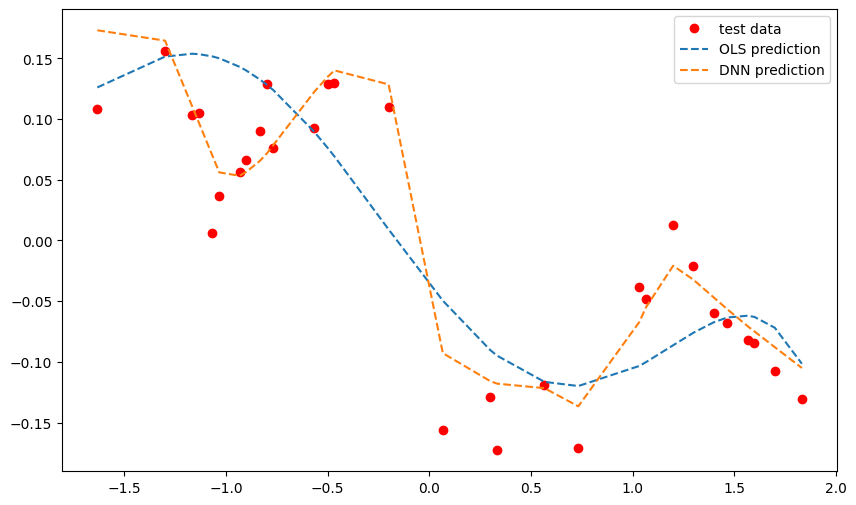

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(f_te, l_te, 'ro', label='test data')
plt.plot(f_te, p_ols, '--', label='OLS prediction')
plt.plot(f_te, p_dnn, '--', label='DNN prediction')
plt.legend()

# Bias and Variance

The linear regression fit has a high bias on the trainig data set; absolute differences between predicions and label data. The higher order fit shows a high variance. It hits all training data points exactly, but the fit itself varies significantly to achieve the perfect fit.

In [131]:
# smaller features data sub-set
f_tr = f[:20:2]
# smaller labels data sub-set
l_tr = l[:20:2]

In [137]:
f_va = f[1:20:2]
l_va = l[1:20:2]

In [133]:
# high bias OLS regression (linear)
reg_b = np.polyfit(f_tr, l_tr, deg=1)

In [134]:
# high variance OLS regression (higher order)
reg_v = np.polyfit(f_tr, l_tr, deg=9, full=True)[0]

In [135]:
# enlarged features data set for plotting
f_ = np.linspace(f_tr.min(), f_va.max(), 75)

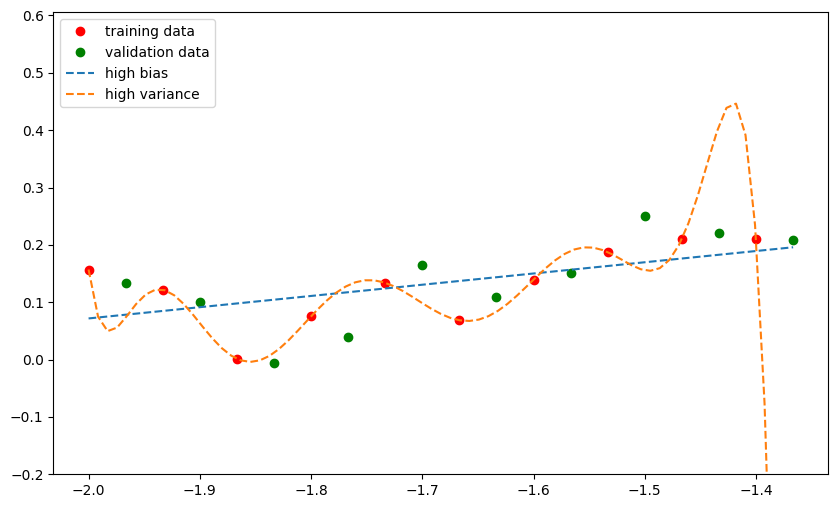

In [138]:
plt.figure(figsize=(10, 6))
plt.plot(f_tr, l_tr, 'ro', label='training data')
plt.plot(f_va, l_va, 'go', label='validation data')
plt.plot(f_, np.polyval(reg_b, f_), '--', label='high bias')
plt.plot(f_, np.polyval(reg_v, f_), '--', label='high variance')
plt.ylim(-0.2)
plt.legend(loc=2)

In [143]:
# calculates R^2 values

from sklearn.metrics import r2_score

def evaluate(reg, f, l):
    p = np.polyval(reg, f)
    # model bias as mean absolute differences
    bias = np.abs(l - p).mean()
    # model variance as variance of model predictions
    var = p.var()
    msg = f'MSE={MSE(l, p):.4f} | R2={r2_score(l, p):9.4f} | '
    msg += f'bias={bias:.4f} | var={var:.4f}'
    print(msg)

In [144]:
# performance of high bias model on training data
evaluate(reg_b, f_tr, l_tr)

MSE=0.0026 | R2=   0.3484 | bias=0.0423 | var=0.0014


In [145]:
# performane of high bias model on validation data
evaluate(reg_b, f_va, l_va)

MSE=0.0032 | R2=   0.4498 | bias=0.0460 | var=0.0014


In [148]:
# performance of high variance model on training data
evaluate(reg_v, f_tr, l_tr)

MSE=0.0000 | R2=   1.0000 | bias=0.0000 | var=0.0040


In [149]:
# performance of high variance model on validation data
evaluate(reg_v, f_va, l_va)

MSE=0.8752 | R2=-149.2664 | bias=0.3565 | var=0.7539


# Cross-validation

A standard approach to avoid overfitting is cross-validation, during which multiplt training and validation data populations are tested. The five-fold cross-validation is implemented for different degrees for the highest polynomial. The cross-validation scores become, on average, worse the higer the highest degree is in the regression. Particularly bad results are obeserved when the first 20% of the data is used for validation or the final 20% of the data is used.

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [158]:
# creates a polynomial regression model class
def PolynomialRegression(degree=None, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(*kwargs))

In [160]:
np.set_printoptions(suppress=True,
                    formatter={'float': lambda x: f'{x:12.2f}'})

In [161]:
print('\nCross-validation socres')
print(74 * '=')
for deg in range(0, 10, 1):
    model = PolynomialRegression(deg)
    # implements the five-fold cross-validation
    cvs = cross_val_score(model, f.reshape(-1, 1), l, cv=5)
    print(f'deg={deg} | ' + str(cvs.round(2)))


Cross-validation socres
deg=0 | [       -6.07        -7.34        -0.09        -6.32        -8.69]
deg=1 | [       -0.28        -1.40         0.16        -1.66        -4.62]
deg=2 | [       -3.48        -2.45         0.19        -1.57       -12.94]
deg=3 | [       -0.00        -1.24         0.32        -0.48       -43.62]
deg=4 | [     -222.81        -2.88         0.37        -0.32      -496.61]
deg=5 | [     -143.67        -5.85         0.49         0.12     -1241.04]
deg=6 | [    -4038.96       -14.71         0.49        -0.33      -317.32]
deg=7 | [    -9937.83       -13.98         0.64         0.22    -18725.61]
deg=8 | [    -3514.36       -11.22        -0.15        -6.29   -298744.18]
deg=9 | [    -7454.15        -0.91         0.15        -0.41    -13580.75]


`Keras` provides wrapper classes to use `Keras` mdoel object with `scikit-learn` functionality, such as `cross_val_score` funnction.

In [164]:
# Error solving : ModuleNotFoundError: No module named 'keras.wrappers'
# https://stackoverflow.com/questions/77104125/no-module-named-keras-wrappers
!pip install scikeras

In [167]:
np.random.seed(100)
tf.random.set_seed(100)
# from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor

In [172]:
# wrapper class for neural network with loe capacity
model = KerasRegressor(build_fn=create_dnn_model, verbose=False, epochs=1000, hl=1, hu=36)

In [174]:
# cross-validation for neural network with low capacity
%time cross_val_score(model, f.reshape(-1, 1), l, cv=5)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

CPU times: user 43.7 s, sys: 1.91 s, total: 45.6 s
Wall time: 44.6 s


array([       -4.73,        -5.41,         0.80,        -0.07,
             -43.13])

In [175]:
# wrapper class for neural network with high capacity
model = KerasRegressor(build_fn=create_dnn_model, verbose=False, epochs=1000, hl=3, hu=256)

In [176]:
# cross-validation for neural network with high capacity
%time cross_val_score(model, f.reshape(-1, 1), l, cv=5)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

CPU times: user 1min 44s, sys: 4.87 s, total: 1min 49s
Wall time: 1min 38s


array([       -0.95,        -3.41,         0.44,        -0.30,
             -31.26])